# Dispa-SET Post-processing

This Notebook illustrates how Dispa-SET simulation results can be loaded, analysed and plotted. It uses the functions provided within the PostProcessing.py file.

Sylvain Quoilin, Joint Research Centre

November 2016

### Load DispaSET and the required libraries:

In [6]:
%matplotlib inline
from __future__ import division
import sys
sys.path.append("..")  

import DispaSET as ds
import pandas as pd
import numpy as np

### Define the path to the simulation environment

The folder must contain the simulatin inputs (written by the pre-processing tool) as wall as the simulation results (Results.gdx).

In [11]:
path = '../Simulations/simulation_test'

### Load the inputs and the results of the simulation

This can be computationally intensive for large simulations:

In [12]:
inputs,results = ds.get_sim_results(path=path,cache=True)

170307 15:09:07 [INFO    ] (get_gams_path): Detected /home/sylvain/progs/GAMS/gams24.4_linux_x64_64_sfx/ as GAMS path on this computer
170307 15:09:08 [INFO    ] (gdx_to_list): Loading gdx file ../Simulations/simulation_test/Results.gdx took 0.348658084869s
170307 15:09:08 [INFO    ] (gdx_to_dataframe): Time to convert to dataframes: 0.377683877945s


### Format the inputs as a dictionary of dataframes:

In [13]:
datain = ds.ds_to_df(inputs)

### Select the time period for plotting

In [14]:
rng = pd.DatetimeIndex(start='2015-01-02 00:00:00',end='2015-02-02 04:01:00',freq='h')

### Plotting the detailed analysis for one of the zones, randomly

In [15]:
Nzones = len(inputs['sets']['n'])
c = inputs['sets']['n'][np.random.randint(Nzones)]
print('Randomly selected zone for the detailed analysis: '+ c)

Randomly selected zone for the detailed analysis: NL


### Generate plots

for the selected zone:
- dispatch plot (generation per fuel type) 
- rug  plog (ON/OFF status of each power plant 

True

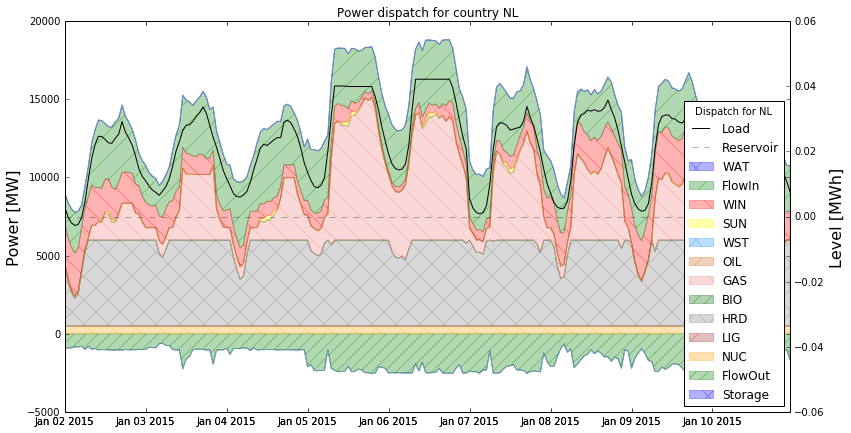

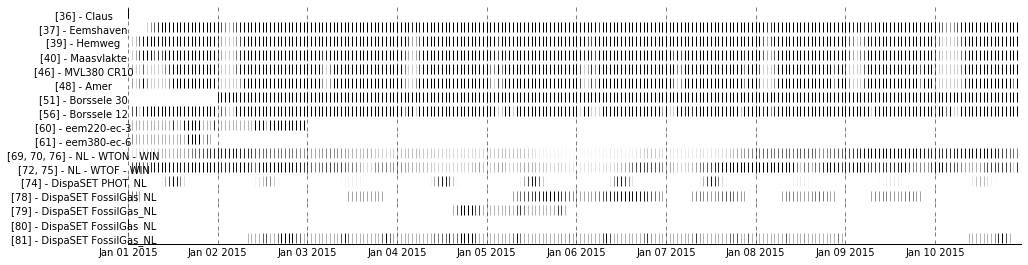

In [25]:
ds.plot_country(inputs,results,c,rng=rng)

### Analyse the results for each country and provide quantitative indicators:

In [17]:
r = ds.get_result_analysis(inputs,results)


Average electricity cost : 27.2846403128 EUR/MWh

Aggregated statistics for the considered area:
Total consumption:5.34581115 TWh
Peak load:29721.0 MW
Net importations:0.581289 TWh

Country-Specific values (in TWh or in MW):
      Demand  PeakLoad  NetImports  LoadShedding  Curtailment
BE  2.564954   13435.5    0.180910           NaN          NaN
NL  2.780857   16285.5    0.400379       0.00002     0.000692

Number of hours of congestion on each line: 
{'BE -> NL': 9, 'NL -> BE': 53}


### Plot the levels of all storage units:

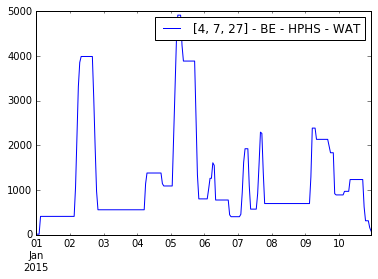

In [18]:
if 'OutputStorageLevel' in results:
    results['OutputStorageLevel'].plot()

### Bar plot of the overall generation in each zone by fuel type:

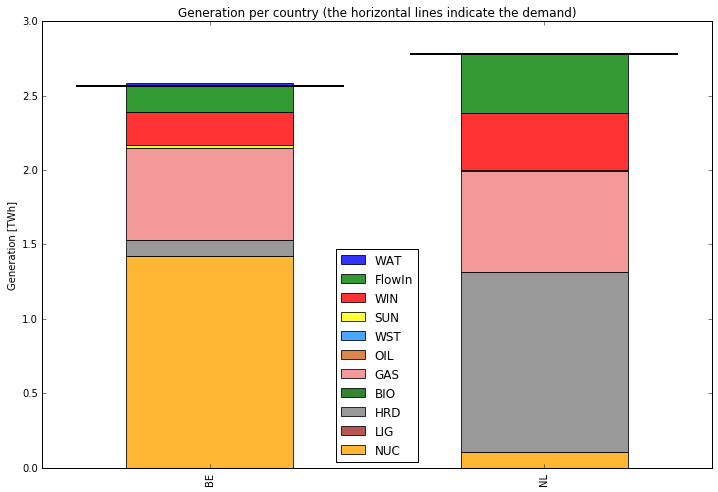

In [19]:
PPindicators = ds.get_indicators_powerplant(inputs,results)
ax = ds.plot_energy_country_fuel(datain,results,PPindicators)

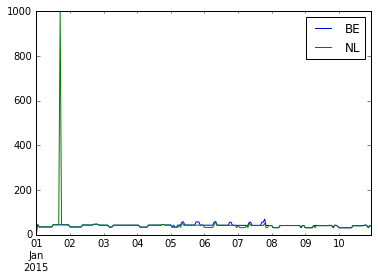

In [20]:
results['ShadowPrice'].plot()

In [21]:
inputs['units'].groupby(['Fuel']).sum()['PowerCapacity']

Fuel
BIO     1114.0
GAS    34370.0
HRD     6098.0
NUC     6418.0
SUN     4382.0
WAT     1308.0
WIN     5603.0
Name: PowerCapacity, dtype: float64

In [22]:
inputs['units']

,PowerCapacity,Unit,Zone,Technology,Fuel,Efficiency,TimeUpMinimum,TimeDownMinimum,RampUpRate,RampDownRate,...,PartLoadMin,MinEfficiency,StartUpTime,EmissionRate,CHPType,CHPPowerToHeat,StorageCapacity,STOSelfDischarge,StorageChargingCapacity,StorageChargingEfficiency
[0] - TIHANGE 3,1046.0,[0] - TIHANGE 3,BE,STUR,NUC,0.405,24.0,24.0,0.003279,0.003279,...,0.9,0.405,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN
[1] - DOEL 4,1038.0,[1] - DOEL 4,BE,STUR,NUC,0.405,24.0,24.0,0.003304,0.003304,...,0.9,0.405,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN
[2] - TIHANGE 2,1008.0,[2] - TIHANGE 2,BE,STUR,NUC,0.405,24.0,24.0,0.003403,0.003403,...,0.9,0.405,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN
[3] - DOEL 3,1006.0,[3] - DOEL 3,BE,STUR,NUC,0.405,24.0,24.0,0.003410,0.003410,...,0.9,0.405,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN
"[4, 7, 27] - BE - HPHS - WAT",1308.0,"[4, 7, 27] - BE - HPHS - WAT",BE,HPHS,WAT,0.860,0.0,0.0,0.688073,0.688073,...,0.0,0.860,0.0,0.00,NaN,NaN,5886.0,0.0,1308.0,0.86
[5] - TIHANGE 1N,481.0,[5] - TIHANGE 1N,BE,STUR,NUC,0.405,24.0,24.0,0.007131,0.007131,...,0.9,0.405,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN
[6] - TIHANGE 1S,481.0,[6] - TIHANGE 1S,BE,STUR,NUC,0.405,24.0,24.0,0.007131,0.007131,...,0.9,0.405,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN
[8] - DROGENBOS TGV,465.0,[8] - DROGENBOS TGV,BE,COMC,GAS,0.525,5.0,1.0,0.024022,0.024022,...,0.4,0.525,0.0,0.45,NaN,NaN,NaN,NaN,NaN,NaN
[9] - HERDERSBRUG STEG,465.0,[9] - HERDERSBRUG STEG,BE,COMC,GAS,0.525,5.0,1.0,0.024022,0.024022,...,0.4,0.525,0.0,0.45,NaN,NaN,NaN,NaN,NaN,NaN
[10] - Amercoeur 1 R TGV,451.0,[10] - Amercoeur 1 R TGV,BE,COMC,GAS,0.525,5.0,1.0,0.024767,0.024767,...,0.4,0.525,0.0,0.45,NaN,NaN,NaN,NaN,NaN,NaN
